In [684]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "apple-stock-prices-updated-15-august-2024"

# **Import**

In [685]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(skimr)

# **1. Data Import & EDA**

In [686]:
df <- read_csv('/kaggle/input/apple-stock-prices-updated-15-august-2024/AppleStockPrice.csv', show_col_types = FALSE)

In [687]:
str(df)

spc_tbl_ [11,030 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date     : chr [1:11030] "12-12-1980" "15-12-1980" "16-12-1980" "17-12-1980" ...
 $ Open     : num [1:11030] 0.128 0.122 0.113 0.116 0.119 ...
 $ High     : num [1:11030] 0.129 0.122 0.113 0.116 0.119 ...
 $ Low      : num [1:11030] 0.128 0.122 0.113 0.116 0.119 ...
 $ Close    : num [1:11030] 0.128 0.122 0.113 0.116 0.119 ...
 $ Adj Close: num [1:11030] 0.0989 0.0938 0.0869 0.089 0.0916 ...
 $ Volume   : num [1:11030] 469033600 175884800 105728000 86441600 73449600 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Open = col_double(),
  ..   High = col_double(),
  ..   Low = col_double(),
  ..   Close = col_double(),
  ..   `Adj Close` = col_double(),
  ..   Volume = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [688]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date*,1,11030,5515.50000,3184.23107,5515.500000,5515.500000,4088.2695000,1.000000,11030.0000,11029.0000,0.000000,-1.200326,30.3191359
Open,2,11030,22.87645,47.16881,0.533482,9.262428,0.6569104,0.049665,236.4800,236.4303,2.508428,5.308216,0.4491249
High,3,11030,23.12285,47.67428,0.541295,9.357803,0.6676667,0.049665,237.2300,237.1803,2.506176,5.288841,0.4539378
Low,4,11030,22.63951,46.69298,0.526507,9.168470,0.6482239,0.049107,233.0900,233.0409,2.510158,5.321578,0.4445942
Close,5,11030,22.89117,47.20594,0.533482,9.266587,0.6577377,0.049107,234.8200,234.7709,2.508084,5.304398,0.4494784
Adj Close,6,11030,22.07517,46.75312,0.435625,8.460342,0.5438103,0.037856,234.5485,234.5107,2.554477,5.526295,0.4451669
Volume,7,11030,317301923.10063,335277880.90438,204985200.000000,253372119.514959,168179917.0800000,0.000000,7421640800.0000,7421640800.0000,3.564307,30.281354,3192398.8573683


In [689]:
summary(df)

     Date                Open                High                Low           
 Length:11030       Min.   :  0.04966   Min.   :  0.04966   Min.   :  0.04911  
 Class :character   1st Qu.:  0.29911   1st Qu.:  0.30525   1st Qu.:  0.29143  
 Mode  :character   Median :  0.53348   Median :  0.54129   Median :  0.52651  
                    Mean   : 22.87645   Mean   : 23.12285   Mean   : 22.63951  
                    3rd Qu.: 20.48500   3rd Qu.: 20.59723   3rd Qu.: 20.29152  
                    Max.   :236.48000   Max.   :237.23000   Max.   :233.09000  
     Close             Adj Close             Volume          
 Min.   :  0.04911   Min.   :  0.03786   Min.   :         0  
 1st Qu.:  0.29911   1st Qu.:  0.24255   1st Qu.: 112562800  
 Median :  0.53348   Median :  0.43562   Median : 204985200  
 Mean   : 22.89117   Mean   : 22.07517   Mean   : 317301923  
 3rd Qu.: 20.42884   3rd Qu.: 17.48102   3rd Qu.: 398077400  
 Max.   :234.82001   Max.   :234.54852   Max.   :7421640800  

**Check missing value**

In [690]:
colSums(is.na(df))

Date      Open      High       Low     Close Adj Close    Volume 
        0         0         0         0         0         0         0

**duplicate check**

In [691]:
sum(duplicated(df))

[1] 0

In [692]:
head(df)

Date,Open,High,Low,Close,Adj Close,Volume
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12-12-1980,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
15-12-1980,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
16-12-1980,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
17-12-1980,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
18-12-1980,0.118862,0.119420,0.118862,0.118862,0.091630,73449600
19-12-1980,0.126116,0.126674,0.126116,0.126116,0.097223,48630400


# **2. Data Transform for Visualization**

In [693]:
df$Date <- as.Date(df$Date, format = '%d-%m-%Y')

In [694]:
names(df) <- c('Date','Open','High','Low','Close','Adj','Volume')

**Data Check**

In [695]:
head(df)

Date,Open,High,Low,Close,Adj,Volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400


# **3. Data Visulization**

## **Histogram**

In [696]:
options(repr.plot.width = 13.0, repr.plot.height = 13.0)

In [697]:
p1 <- ggplot(df, aes(x= Open)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('Open Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <-ggplot(df, aes(x= High)) + geom_histogram(fill = 'blue',bins = 30 , col = 'white') + 
    theme_bw() +
    ggtitle('High Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <-ggplot(df, aes(x= Low)) + geom_histogram(fill = 'orange',bins = 30, col = 'white') +
    theme_bw() +
    ggtitle('Low Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <-ggplot(df, aes(x= Close)) + geom_histogram(fill = 'green',bins = 30, col = 'white' ) + 
    theme_bw() +
    ggtitle('Close Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <-ggplot(df, aes(x= Adj)) + geom_histogram(fill = 'yellow', bins = 30,, col = 'white') + 
    theme_bw() +
    ggtitle('Adj Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <-ggplot(df, aes(x= Volume)) + geom_histogram(fill = 'red',bins = 30 ,col = 'white') + 
    theme_bw() +
    ggtitle('Volume Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

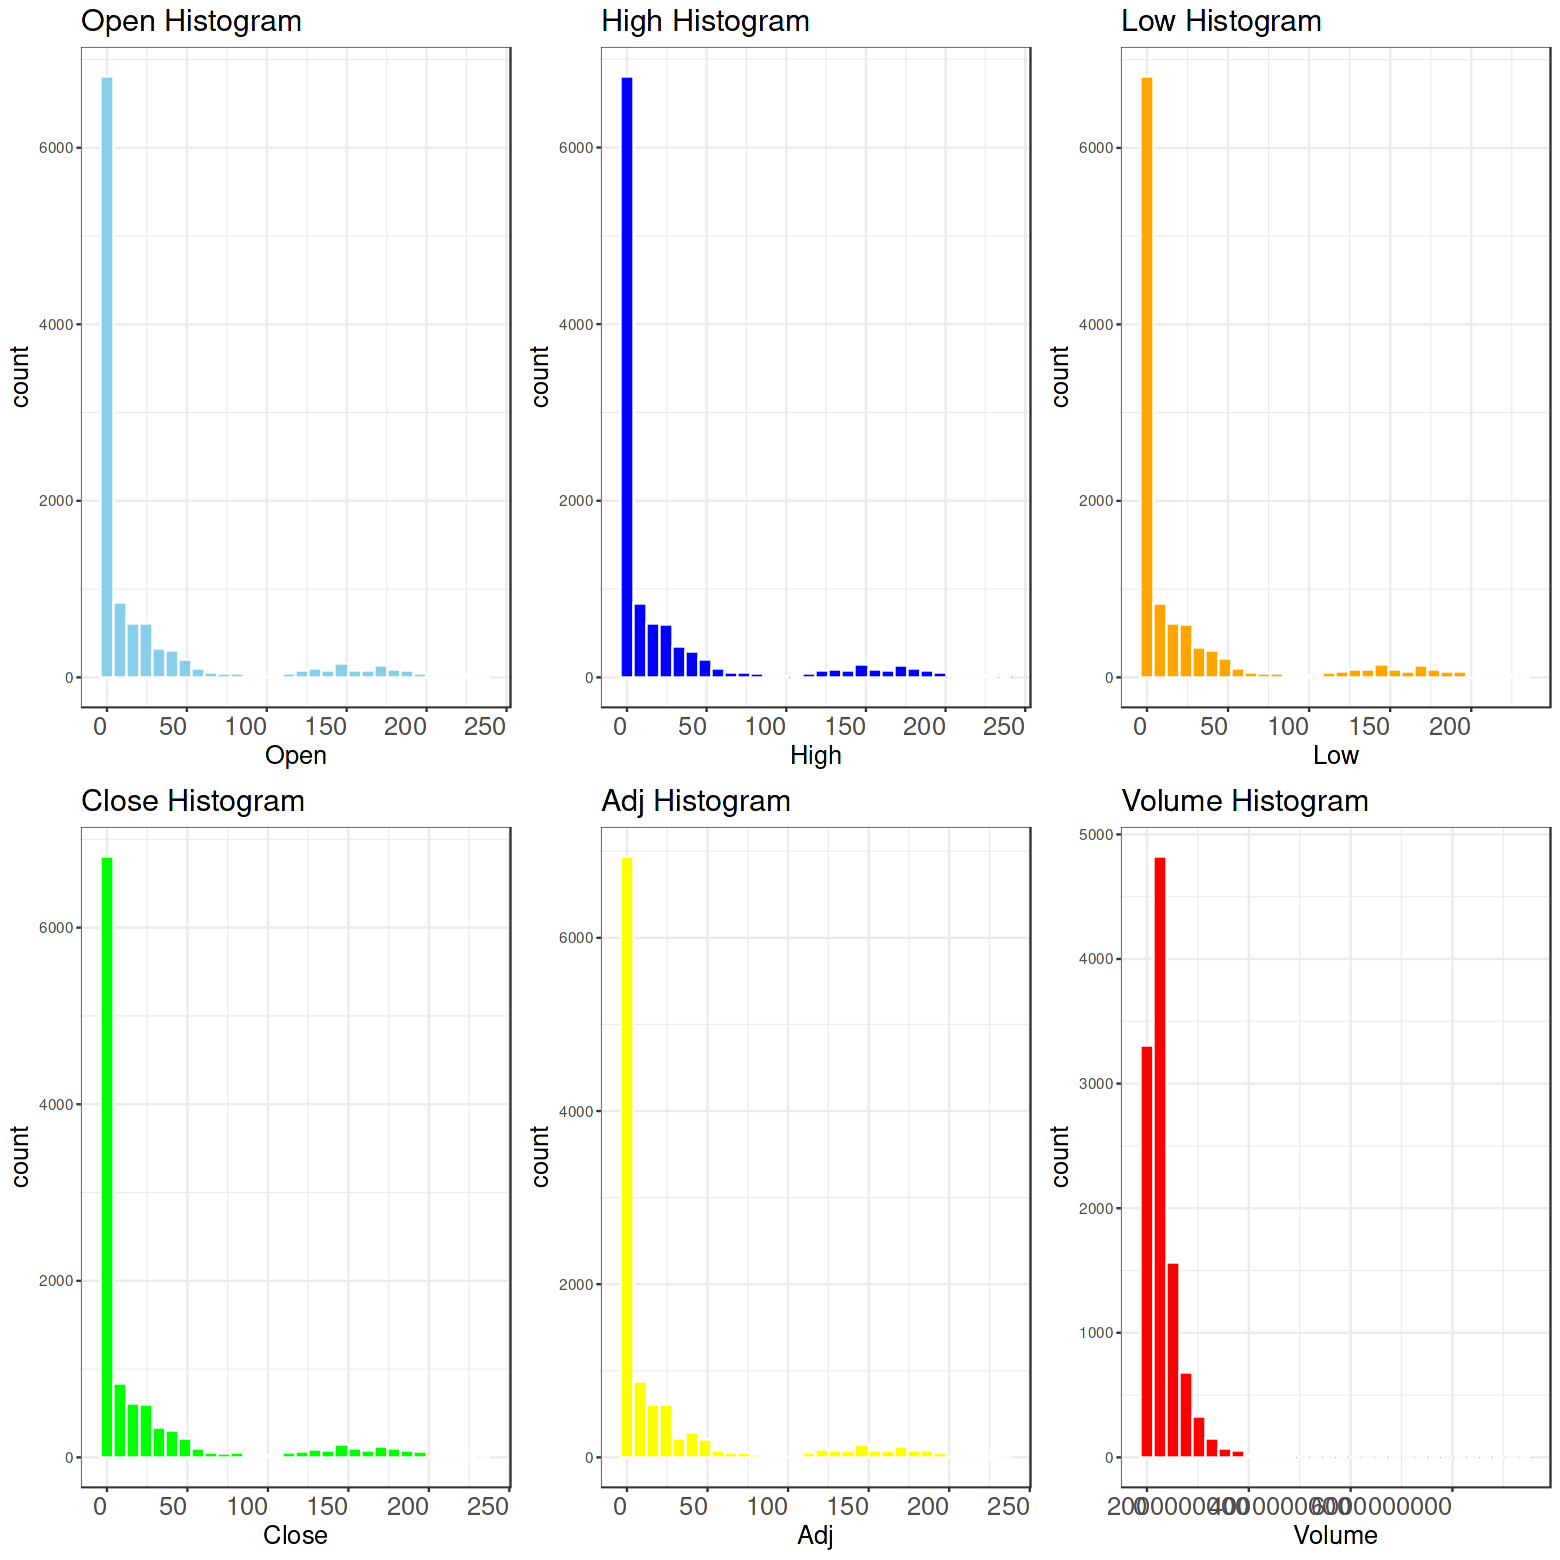

In [698]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

## **Lineplot**

In [699]:
p1 <- ggplot(df, aes(x=Date, y= Open)) + geom_line(color = 'skyblue' ) + ggtitle('Change in \'Open\' by year') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <- ggplot(df, aes(x=Date, y= High)) + geom_line(color = 'blue') + ggtitle('Change in \'High\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <- ggplot(df, aes(x=Date, y= Low)) + geom_line(color = 'orange') + ggtitle('Change in \'Low\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <- ggplot(df, aes(x=Date, y= Close)) + geom_line(color = 'green') + ggtitle('Change in \'Close\' by year') + 
    theme_bw() +    
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <- ggplot(df, aes(x=Date, y= Adj)) + geom_line(color = 'yellow') + ggtitle('Change in \'Adj\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <- ggplot(df, aes(x=Date, y= Volume)) + geom_line(color = 'red') + ggtitle('Change in \'Volume\' by year') + 
    theme_bw() + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

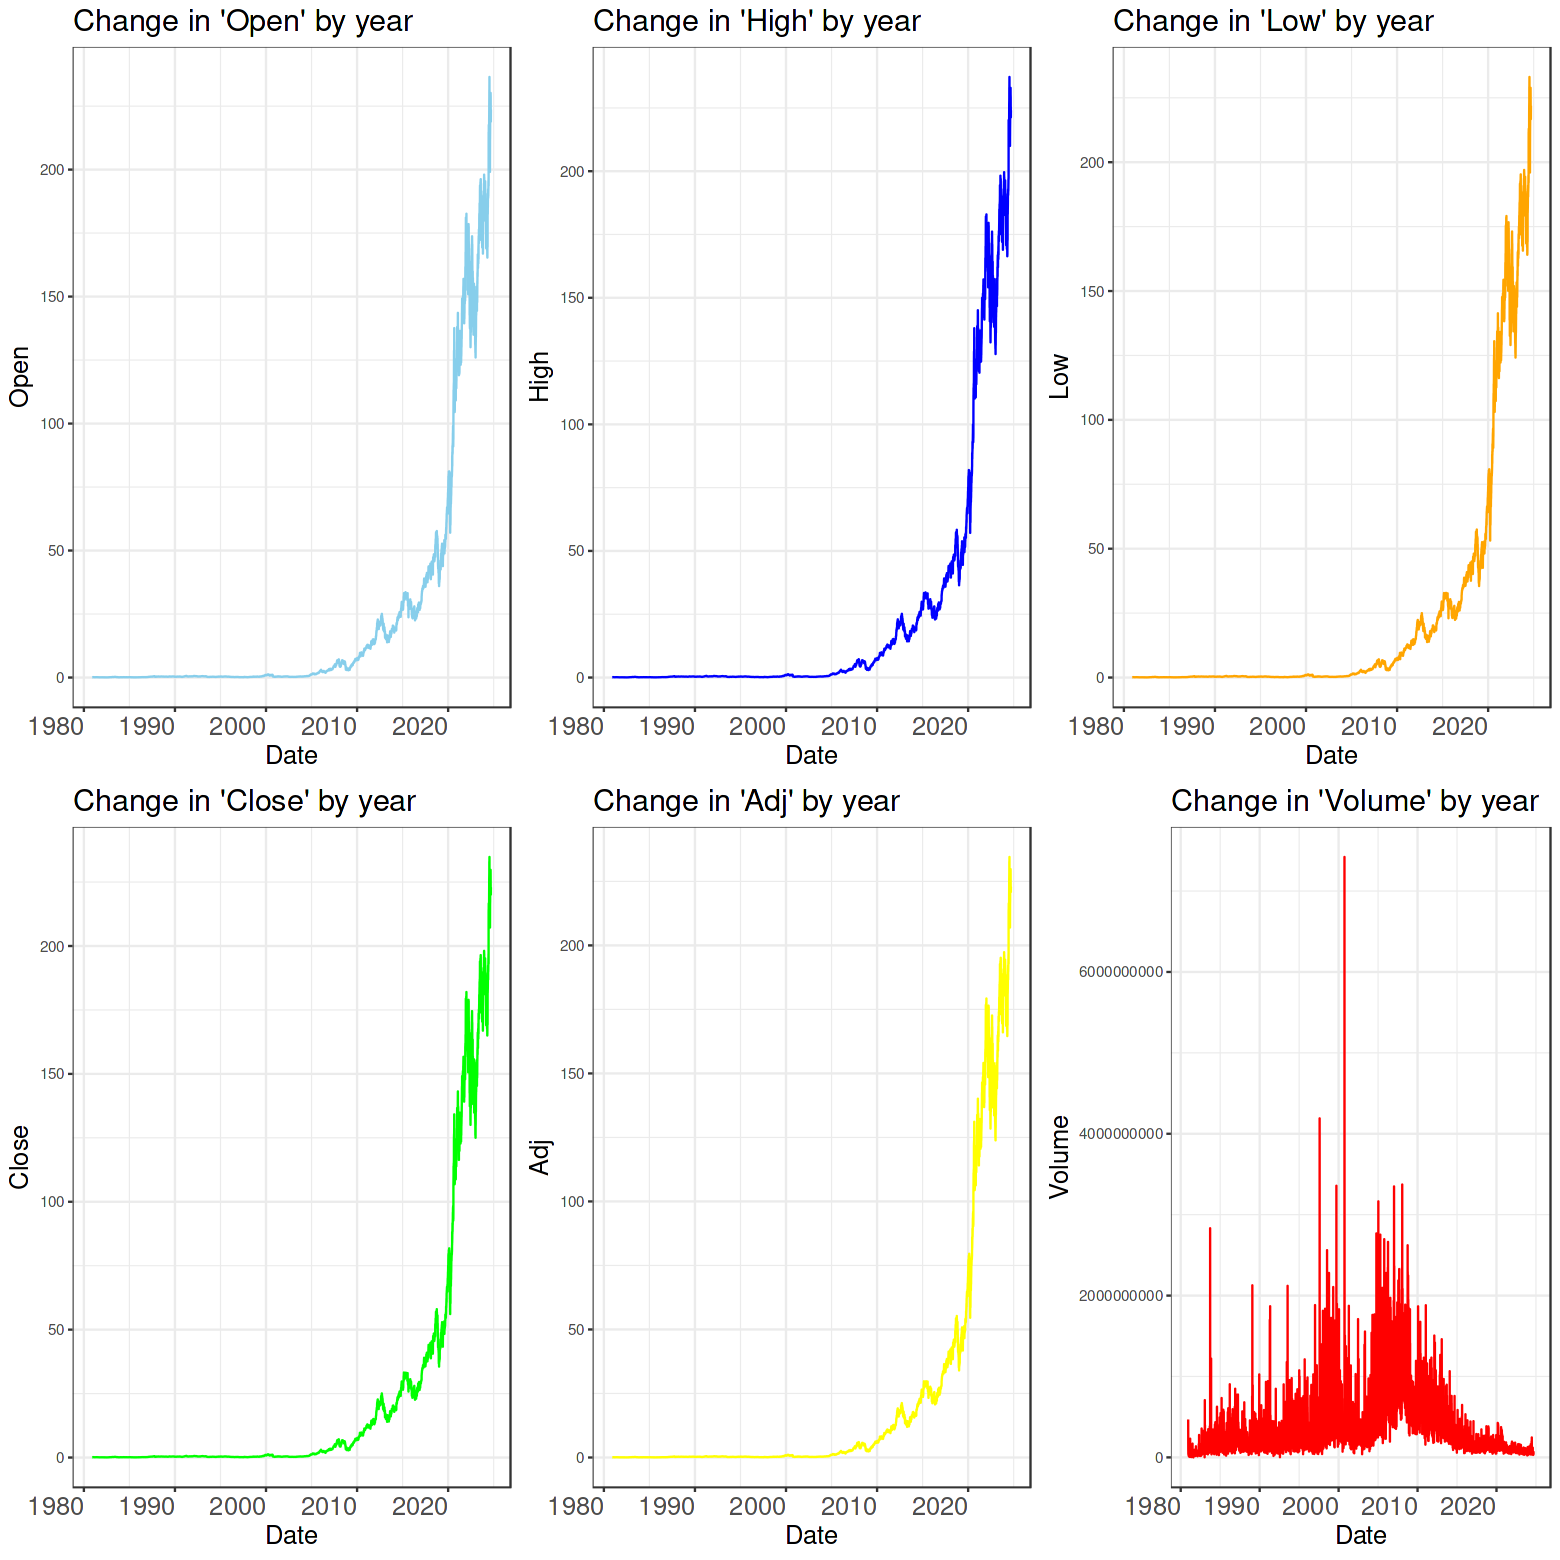

In [700]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

## **Rolling windows(90 Days, 180Days, 300Days) of Close**

In [701]:
df2 <- df

temp <- zoo::zoo(df$Close, df2$Date)
temp_rollmean90 <- zoo::rollmean(temp, 3 , fill = list(NA, NULL, NA))
temp_rollmean180 <- zoo::rollmean(temp, 6 , fill = list(NA, NULL, NA))
temp_rollmean300 <- zoo::rollmean(temp, 10 , fill = list(NA, NULL, NA))

df2$mean90_close <- zoo::coredata(temp_rollmean90)
df2$mean180_close <- zoo::coredata(temp_rollmean180)
df2$mean300_close <- zoo::coredata(temp_rollmean300)

In [702]:
p1 <- ggplot(df2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean90_close), color = 'red', size = 0.7) +
        ggtitle('Rolling windows(90 Days, 180Days, 300Days) of Close(90 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p2 <- ggplot(df2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean180_close), color = 'blue', size = 0.7) +
        ggtitle('Rolling windows(90 Days, 180Days, 300Days) of Close(180 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p3 <- ggplot(df2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean300_close), color = 'orange', size = 0.7) +
        ggtitle('Rolling windows(90 Days, 180Days, 300Days) of Close(300 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_line()`).”


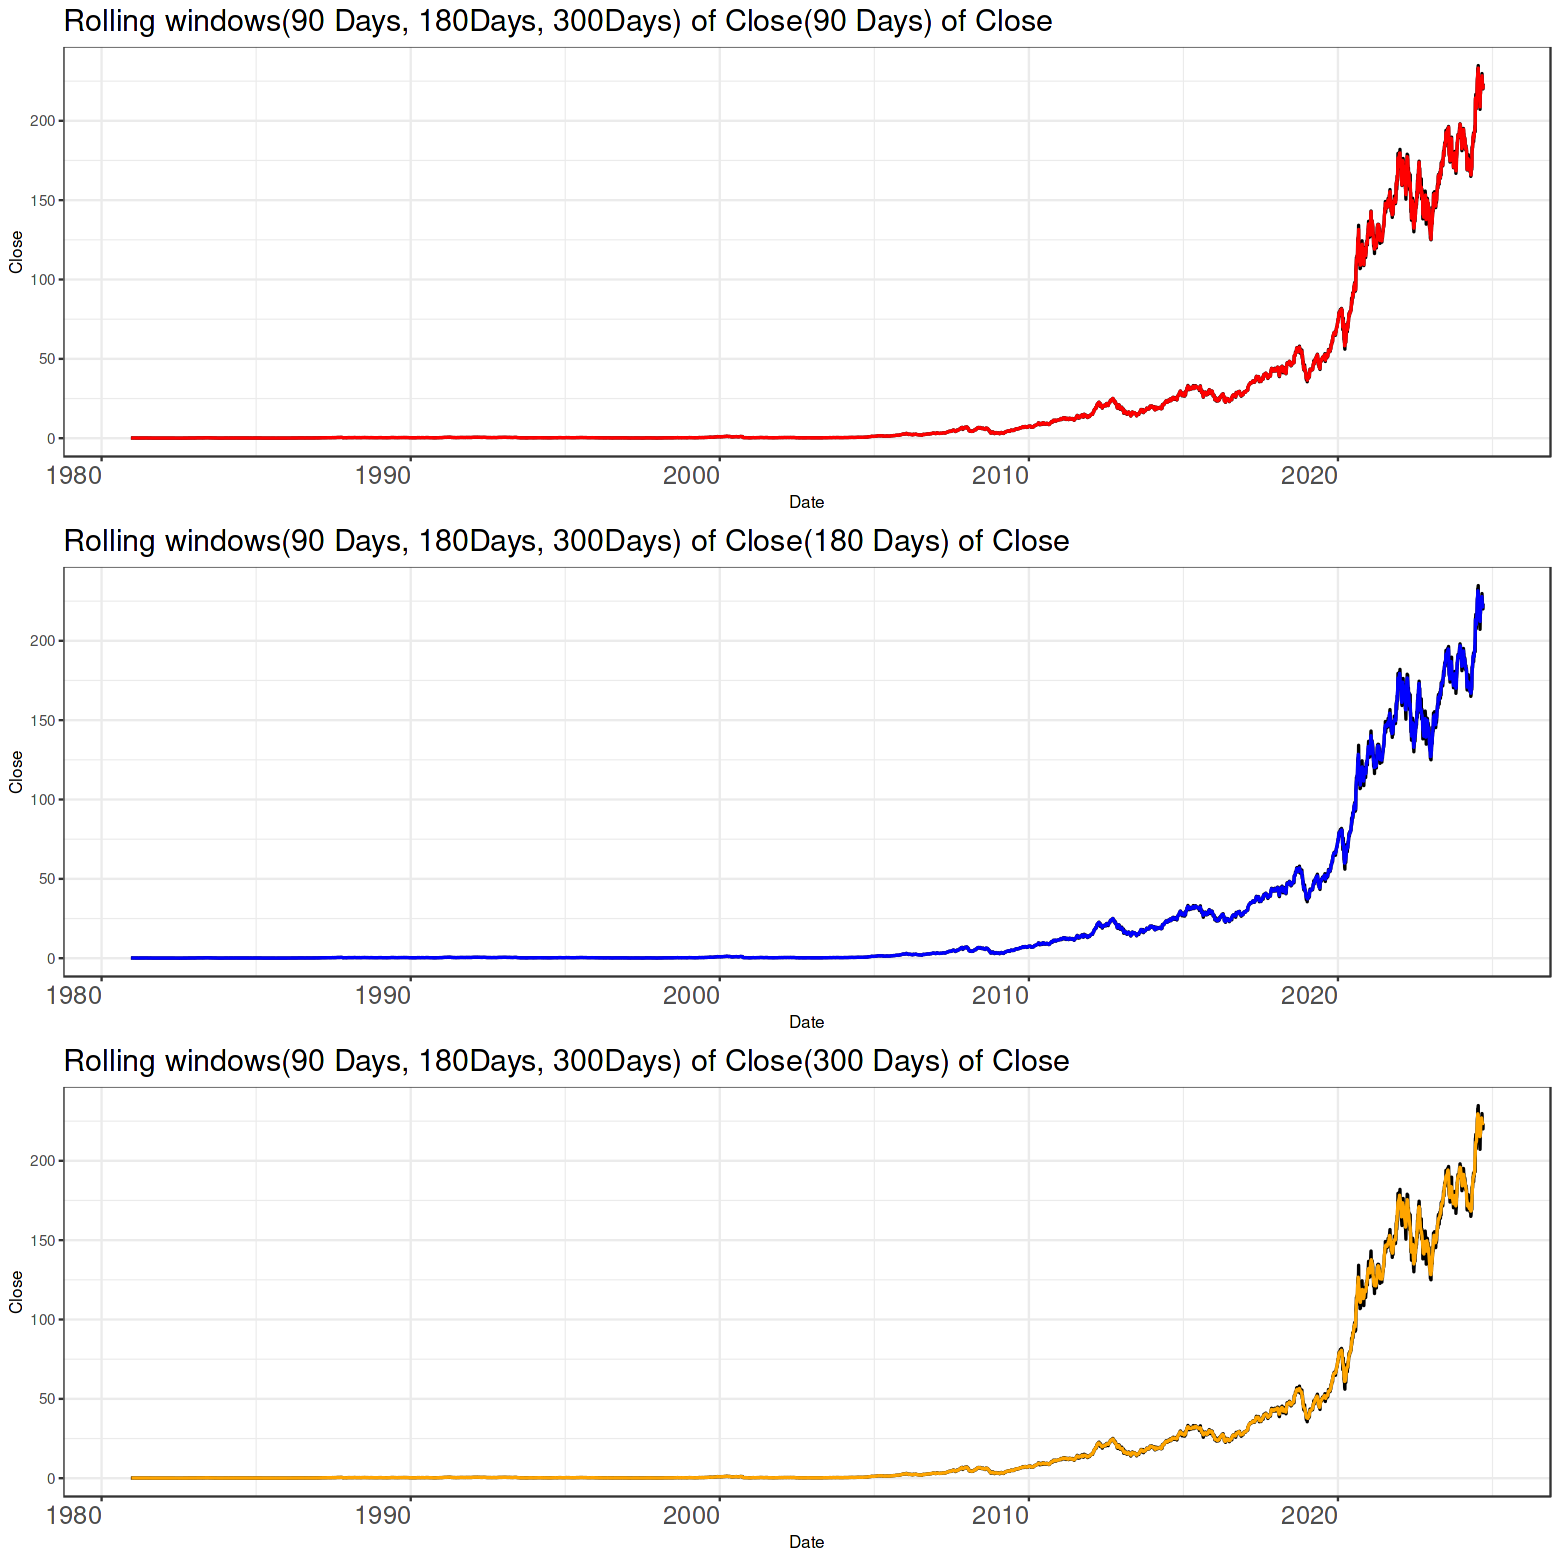

In [703]:
grid.arrange(p1,p2,p3, ncol = 1)

## **Correlation**

In [704]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

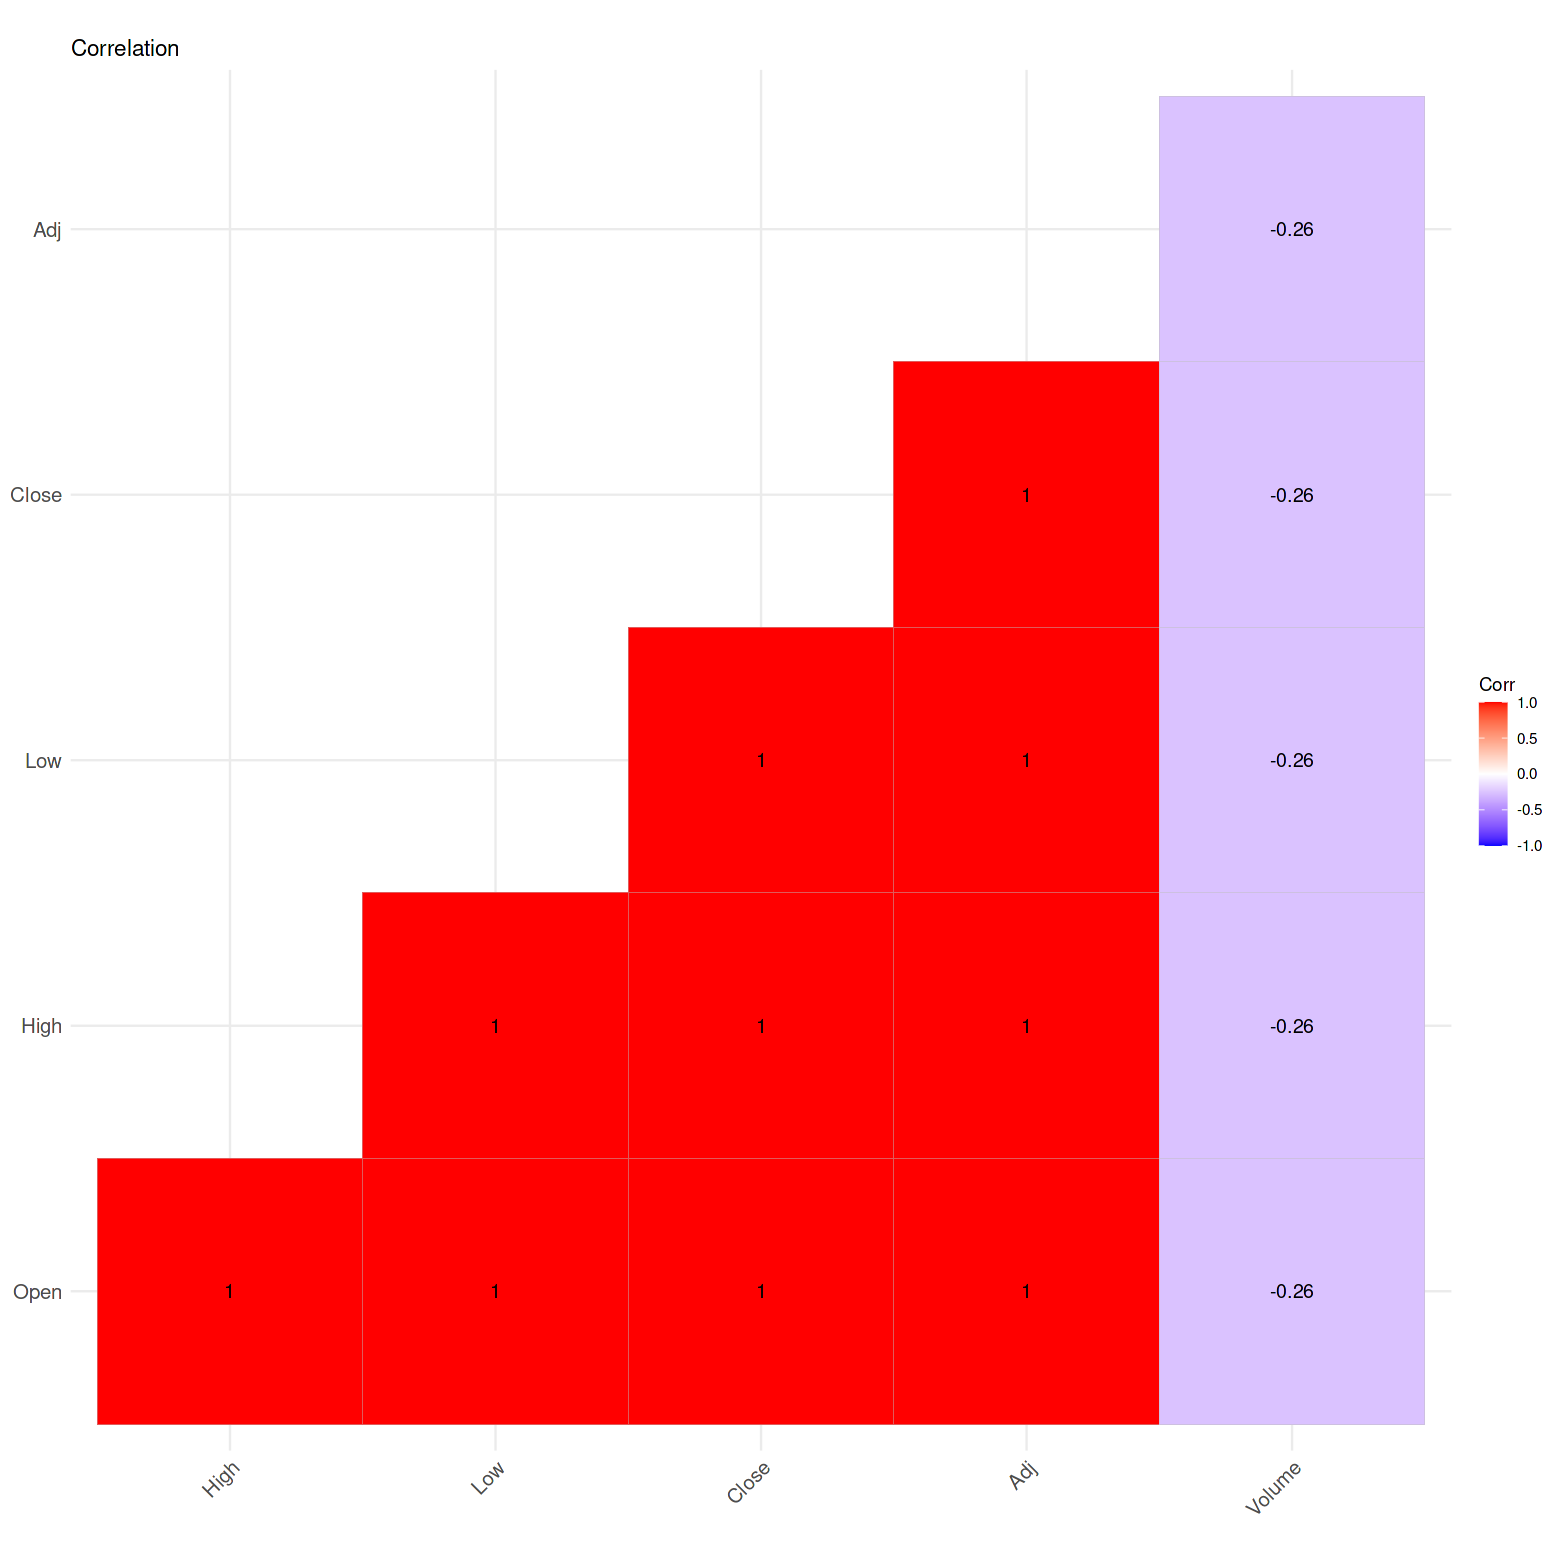

In [705]:
ggcorrplot(cor(df[num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [706]:
library(keras)
library(tensorflow)
library(TTR)
library(forecast)

## **12 month prediction**

## **Standard Scale**

In [707]:
scale <- c(mean(df$Close), sd(df$Close))

In [708]:
Close <- df %>% select(Close) %>% mutate(Close = (Close - scale[1]) / scale[2])

In [709]:
standard <- function(x){
    return((x-mean(x)) / sd(x))
}

In [710]:
Close <- as.matrix(Close)

## **Train Test Split**

In [711]:
prediction <- 12
lag <- prediction

X_train_data <- t(sapply(1:(length(Close) - lag - prediction + 1), function(x) Close[x:(x + lag - 1), 1]))

In [712]:
X_train_arr <- array(
  data = as.numeric(unlist(X_train_data)),
  dim = c(
    nrow(X_train_data),
    lag,
    1))

In [713]:
Y_train_data <- t(sapply((1 + lag):(length(Close) - prediction + 1),function(x) Close[x:(x + prediction - 1)]))

In [714]:
Y_train_arr <- array(
    data = as.numeric(unlist(Y_train_data)),
    dim = c(
        nrow(Y_train_data),
        prediction,
        1))

In [715]:
X_test <- df$Close[(nrow(Close) - prediction + 1):nrow(Close)]

In [716]:
X_text_scale <- standard(X_test)

In [717]:
X_pred_arr <- array(
  data = X_text_scale,
  dim = c(1, lag, 1))
X_pred_arr

, , 1

          [,1]     [,2]     [,3]       [,4]       [,5]      [,6]       [,7]
[1,] 0.9487709 1.968894 1.724684 -0.2011916 -0.7947198 -0.321752 -0.8039937
          [,8]      [,9]      [,10]      [,11]      [,12]
[1,] -0.776172 -1.023475 -0.2351958 -0.2011916 -0.2846565

## **LSTM Model**

In [718]:
model <- keras_model_sequential()
model %>%
  layer_lstm(units = 50, batch_input_shape = c(1, 12, 1), return_sequences = TRUE) %>% 
  layer_dropout(rate = 0.5) %>%
  layer_lstm(units = 50, return_sequences = TRUE) %>%
  layer_dropout(rate = 0.5)  %>% 
  time_distributed(keras::layer_dense(units = 1))

In [719]:
model %>%
    compile(loss = 'mae', optimizer = 'adam', metrics = 'accuracy')

summary(model)

Model: "sequential_17"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm_33 (LSTM)                     (1, 12, 50)                     10400       
 dropout_29 (Dropout)               (1, 12, 50)                     0           
 lstm_32 (LSTM)                     (1, 12, 50)                     20200       
 dropout_28 (Dropout)               (1, 12, 50)                     0           
 time_distributed_2 (TimeDistribute  (1, 12, 1)                     51          
 d)                                                                             
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
________________________________________________________________________________


In [720]:
history <- model %>% fit(
  X_train_arr,
  Y_train_arr,
  epochs = 10,  
  batch_size = 32,  
  validation_split = 0.2,
  shuffle = FALSE)

In [721]:
lstm_forecast  <- model %>%
    predict(X_pred_arr, batch_size = 1) %>%
    .[, , 1]

In [722]:
lstm_forecast  <- lstm_forecast  * scale[2] + scale[1]

In [723]:
pred <- predict(model, X_train_arr, batch_size = 1) %>%
    .[, , 1]

In [724]:
options(scipen = 10)

In [725]:
if (dim(pred)[2] > 1) {
    fit <- c(pred[, 1], pred[dim(pred)[1], 2:dim(pred)[2]])
} else {
    fit <- pred[, 1]
}

In [726]:
fitted <- fit * scale[2] + scale[1]

In [727]:
fitted <- c(rep(NA, lag), fitted)

In [728]:
lstm_forecast  <- timetk::tk_ts(lstm_forecast ,
    start = c(2023, 9),
    end = c(2024, 9),
    frequency = 12)

In [729]:
input_ts <- timetk::tk_ts(df$Close, 
    start = c(1987, 5), 
    end = c(2023, 9), 
    frequency = 12)

In [730]:
forecast_list <- list(
    model = NULL,
    method = "LSTM",
    mean = lstm_forecast ,
    x = input_ts,
    fitted = fitted,
    residuals = as.numeric(input_ts) - as.numeric(fitted))

Warning message in as.numeric(input_ts) - as.numeric(fitted):
“longer object length is not a multiple of shorter object length”


In [731]:
class(forecast_list) <- "forecast"

In [736]:
forecast_list

            Jan        Feb        Mar        Apr        May        Jun
2023                                                                  
2024   9.441123   7.829176   8.699757   8.830063   8.786568  10.770519
            Jul        Aug        Sep        Oct        Nov        Dec
2023                        36.111939 104.380838 103.389472  -2.097678
2024  14.877035  16.874338  36.111939                                 

In [737]:
#forecast::autoplot(forecast_list)

**Please leave your advice in the comments. Thank you**